# Group Project

## Prep

In [20]:
library(ggplot2)
library(readr)
library(dplyr)
library(stringr)
library(tidyverse)
library(leaps)
library(broom)

In [21]:
food_data = read_csv("https://raw.githubusercontent.com/ibraxsaj/STAT-301-DATASET/refs/heads/main/cleaned_full_data.csv")
head(food_data)

New names:
• `` -> `...1`
Rows: 3290 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): restaurant, url, city, price_range, category_1, category_2
dbl (4): ...1, distance, star, num_reviews

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,restaurant,url,distance,star,num_reviews,city,price_range,category_1,category_2
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0,Sector 17,https://www.doordash.com/store/884779/?pickup=false,0.90,4.0,640,Branpton,$$,Indian,Wraps
1,Golden Palace Restaurant,https://www.doordash.com/store/332454/?pickup=false,2.00,4.0,301,Branpton,$$,Chinese,Chicken
2,McDonald's,https://www.doordash.com/store/1140537/?pickup=false,1.00,4.2,890,Branpton,$$,Bakery,Chicken
3,San Francisco Place,https://www.doordash.com/store/205349/?pickup=false,0.40,4.4,109,Branpton,$,Italian,Sandwiches
4,THE BURGER BROS,https://www.doordash.com/store/940617/?pickup=false,0.09,4.5,481,Branpton,$$,Fast Food,Sandwiches
5,Lazeez Shawarma,https://www.doordash.com/store/567102/?pickup=false,0.90,3.7,730,Branpton,$$,Shawarma,Vegetarian


## Data Description

The dataset we will be using was collected from DoorDash orders (https://www.kaggle.com/datasets/satoshiss/food-delivery-in-canada-door-dash/data), which contains data on restaurants with delivery times under 30 minutes in Canadian cities. The dataset has information on restaurant name, URL, distance from the order, city, as well as other details like price range, reviews and type of food style/food. With a total of 3290 observations and 9 variables in the dataset (Note: Something like id  is not useful since it's unique to each restaurant so it will be dropped).

In [22]:
variables <- data.frame(
  "Variable Name" = c("restaurant", "url", "distance", "star", "num_reviews", "city", "price_range", "category_1", "category_2"),
  "Type" = c("Categorical", "Categorical", "Numerical", "Numerical", "Numerical", "Categorical", "Categorical", "Categorical", "Categorical"),
  "Description" = c("Name of the restaurant", "URL of the restaurant's page", "Distance from the place to make an order in miles", 
                    "Star rating of the restaurant", "Number of reviews the restaurant has received", 
                    "The city where an order placed.", "Price range of the restaurant", 
                    "Primary category of the restaurant (e.g., Italian, Bakery)", 
                    "Secondary category of the restaurant (e.g., Wraps, Vegetarian)")
)
variables

Variable.Name,Type,Description
<chr>,<chr>,<chr>
restaurant,Categorical,Name of the restaurant
url,Categorical,URL of the restaurant's page
distance,Numerical,Distance from the place to make an order in miles
star,Numerical,Star rating of the restaurant
num_reviews,Numerical,Number of reviews the restaurant has received
city,Categorical,The city where an order placed.
price_range,Categorical,Price range of the restaurant
category_1,Categorical,"Primary category of the restaurant (e.g., Italian, Bakery)"
category_2,Categorical,"Secondary category of the restaurant (e.g., Wraps, Vegetarian)"


## Questions

a) How is the distance of an order from the restaurant (response) associated with by the price of the food (price_range) and the rating (star)? We hope to explore whether higher price ranges and better ratings are associated with wether a customer is willing to make an order from either shorter or longer distances. (Change made was from "affected by" to "associated with")

b) Our question is an inference question. Rather than predicting the precise distance, our goal is to comprehend how the price range and star rating affect the distance from the buyer so in otherwords our the objective is to infer correlations between these variables.

## EDA

In [23]:
food_data_clean <- food_data |>
    select(-1) |>
    rename(
        cuisine_type = category_1, 
        food_type = category_2) |>
    mutate(
      distance = as.numeric(distance),
      star = as.numeric(star),
      num_reviews = as.numeric(num_reviews),
      price_range = factor(price_range, levels = c("$", "$$", "$$$", "$$$$")),
      cuisine_type = factor(cuisine_type),
      city = str_replace(city, "Branpton", "Brampton"),
      city = factor(city)) |>
    drop_na()

head(food_data_clean)

restaurant,url,distance,star,num_reviews,city,price_range,cuisine_type,food_type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<chr>
Sector 17,https://www.doordash.com/store/884779/?pickup=false,0.90,4.0,640,Brampton,$$,Indian,Wraps
Golden Palace Restaurant,https://www.doordash.com/store/332454/?pickup=false,2.00,4.0,301,Brampton,$$,Chinese,Chicken
McDonald's,https://www.doordash.com/store/1140537/?pickup=false,1.00,4.2,890,Brampton,$$,Bakery,Chicken
San Francisco Place,https://www.doordash.com/store/205349/?pickup=false,0.40,4.4,109,Brampton,$,Italian,Sandwiches
THE BURGER BROS,https://www.doordash.com/store/940617/?pickup=false,0.09,4.5,481,Brampton,$$,Fast Food,Sandwiches
Lazeez Shawarma,https://www.doordash.com/store/567102/?pickup=false,0.90,3.7,730,Brampton,$$,Shawarma,Vegetarian


## Visualization

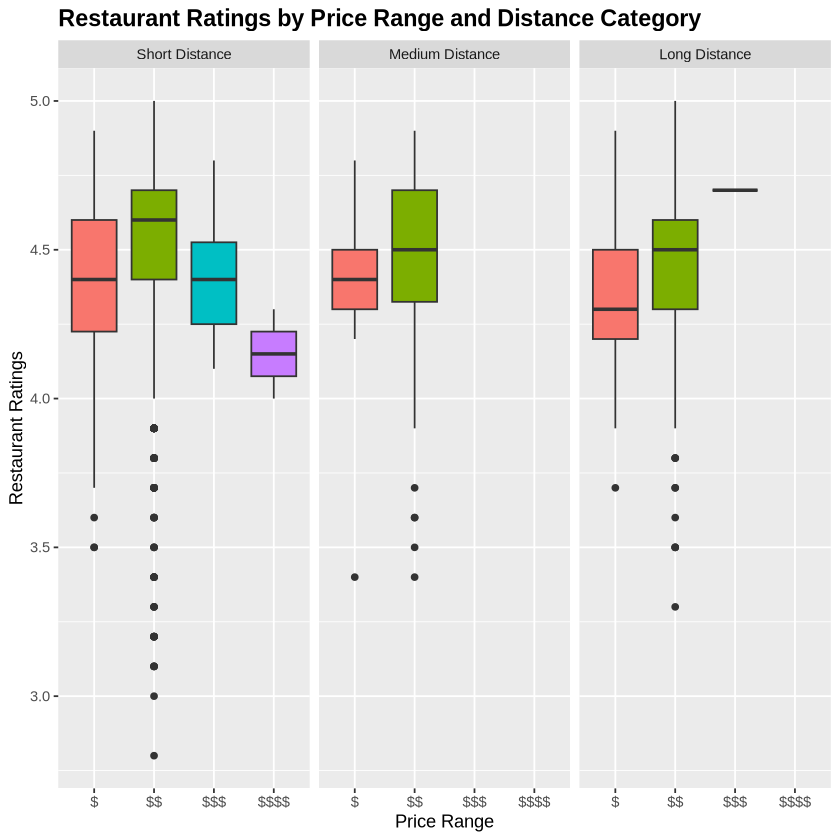

In [24]:
price_rating_distance_plot <- 
    food_data_clean |>
    ggplot(aes(x = price_range, y = star, fill = price_range)) +
    geom_boxplot() +
    facet_wrap(~ cut(distance, breaks = 3, labels = c("Short Distance", "Medium Distance", "Long Distance"))) +
    labs(title = "Restaurant Ratings by Price Range and Distance Category",
         x = "Price Range",
         y = "Restaurant Ratings",
         fill = "Price Range") +
    theme(legend.position = "none",
          plot.title = element_text(size = 14, face = "bold"))


price_rating_distance_plot

This box plot is relevant because it helps show how restaurant ratings vary across different price ranges, we can gather information about whether higher-priced restaurants tend to receive better reviews while also incorporating distance to have a multi-variable analysis to find other trends. We can also learn the spread and deviation of the data along with outliers. We can learn a lot about how well a customer was satisfied relevant to the price they paid. (Change made was I added another input variable since we needed for than 2)

## Methods and Plan

### Updated Research Question

In order to improve our analysis, we would like to investigate how the distance of an order from the restaurant (response variable) is influenced by the price of the food (price_range), the restaurant's rating (star), and additional factors such as the number of reviews (num_reviews).

### Selected Method

I propose using Multiple Linear Regression (MLR) to model the relationship between restaurant distance and the selected predictor variables that we intend to use.

### Justification

- Appropriateness: MLR is suitable for this analysis since we have continuous dependent variable (distance) and multiple independent variables (price_range, star, num_reviews).

- Assumptions: The primary assumptions of MLR include linearity, independence of errors, homoscedasticity, and normality of residuals. As we go on further in the project we will check these.

- Limitations: Categorical variables like price_range must be carefully handled through encoding techniques.

## Computational Code and Output

The backward selection process identified the most impactful predictors that can help us with improving model efficiency.

In [25]:
mlr_model <- lm(distance ~ price_range + star + num_reviews, data = food_data_clean)

backward_selection <- regsubsets(distance ~ price_range + star + num_reviews, 
                                 data = food_data_clean, 
                                 nvmax = 4, method = "backward")

summary(backward_selection)

Subset selection object
Call: regsubsets.formula(distance ~ price_range + star + num_reviews, 
    data = food_data_clean, nvmax = 4, method = "backward")
5 Variables  (and intercept)
                Forced in Forced out
price_range$$       FALSE      FALSE
price_range$$$      FALSE      FALSE
price_range$$$$     FALSE      FALSE
star                FALSE      FALSE
num_reviews         FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: backward
         price_range$$ price_range$$$ price_range$$$$ star num_reviews
1  ( 1 ) "*"           " "            " "             " "  " "        
2  ( 1 ) "*"           " "            " "             "*"  " "        
3  ( 1 ) "*"           " "            "*"             "*"  " "        
4  ( 1 ) "*"           " "            "*"             "*"  "*"        

In [26]:
mlr_gof <- glance(mlr_model) 
            |> round(3)

mlr_gof

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.008,0.006,9.458,4.211,0.001,5,-9418.091,18850.18,18891.14,229357.7,2564,2570


The R-squared value of 0.008 might suggest that our selected model explains only 0.8% of the variance in the response variable which leads me to think this is a very poor fit. The model's explanatory power was not considerably increased by the addition of predictors, as seen by the somewhat lower corrected R-squared (0.006). Although the total predictivity of the model is still weak, the low p-value (0.001) shows that at least one predictor is statistically significant. To improve the model, we may need to explore additional relevant features, transform variables, or consider non-linear relationships.